# Bootstrapped random age bias
* recently revised at: 2023.7

In [1]:
import random
import statistics
import pandas as pd
import numpy as np
import os 
import time
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from tqdm import tqdm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
outpath = "/home/local/PSYCH-ADS/xuqian_chen/Github/agebias-chi/2_pipeline/out/"
modelpath = "/Users/joycecao/Desktop/Research/IRSF/ReplicationMaterials/model_amber/"

In [3]:
# Load models into a dictionary
models = {year: Word2Vec.load(f'{modelpath}pd_{year}.model') for year in range(1950, 2021+1)}

## Dictionaries

In [4]:
list_oa=["老人", "老奶奶", "老爷爷", "曾祖母", "老祖母", "太奶奶", "老人家", "耄耋", "姥姥", "姥爷", "外公", "外婆", "奶奶", "爷爷", "花甲",
        "老婆婆", "古稀", "老母亲", "老父亲", "老伴儿", "老爷子", "老先生", "老太太", "老头", "大爷", "老大爷", "老伯伯", "老俩口"]
list_ya=["小伙子", "青年人", "年轻人", "青年", "年青人", "年轻", "二十一二", "女孩子", "小青年", "少男少女", "女生", "姑娘", "男青年",
        "男孩子", "男生", "涉世未深", "十七八"]

In [5]:
care_vir=['保全', '友善', '友爱', '善,良', '助人为乐', '关心', '关怀', '爱护', '爱护', '关爱', '照顾', '庇护', '保护', '热心', '同情', '怜悯', '共情', '关照']
fair_vir=['正直', '公平', '公正', '公平正义', '合理', '公平合理', '客观', '正义', '权利', '一致', '平等', '互惠', '互利', '互惠互利', '平衡', '诚信']
loya_vir=['团体', '忠心', '忠诚', '忠心耿耿', '矢志不渝', '热爱祖国', '同胞', '爱国', '团结', '团结互助', '团结合作', '祖国', '社群', '集体', '成员', '服务', '奉献', '投身', '投身于'] 
auth_vir=['领导岗位', '权威', '服从', '尊崇', '合法', '责任', '尊敬', '敬重', '敬意', '崇敬', '敬仰', '敬佩', '秩序', '威严', '干部', '领导', '领导干部', '一把手']
sanc_vir=['崇高品质', '崇高', '纯净', '神圣', '清白', '纯洁', '圣洁', '光荣', '庄严', '风范', '光辉', '荣耀', '崇高精神', '高尚', '高尚情操', '赤诚', '情操']
vir = care_vir+fair_vir+loya_vir+auth_vir+sanc_vir

care_vic=['戕害', '欺负', '伤害', '折磨', '践踏', '忍受', '遭受', '暴力', '暴虐', '残暴', '杀戮', '危害', '损害', '妨害', '毁坏', '毁灭', '滥用', '虐待', '无情']
fair_vic=['驱逐', '排外', '作假', '不公', '歧视', '不平', '偏颇', '盲从', '偏见', '偏执', '偏心', '偏爱', '排斥']
loya_vic=['敌伪', '汉奸', '背叛', '变节', '不忠', '敌对', '唾弃', '邪恶势力', '势力', '叛变', '特务', '叛徒', '叛乱']
auth_vic=['无序', '反叛', '违抗', '犯上', '颠覆', '反抗', '反复无常', '无所顾忌', '任,性', '不法', '非法', '不服', '煽动', '违法', '挑动', '混乱']
sanc_vic=['糟粕', '玷污', '传染', '罪恶', '肮脏', '恶心', '纳粹', '法西斯', '堕落', '泯灭', '松懈', '庸俗', '粗鄙', '粗俗', '低劣']
vic = care_vic + fair_vic + loya_vic + auth_vic + sanc_vic

positive=['先进', '始终如一', '独立', '富有', '慷慨', '大方', '效率', '高效', '忙碌', '安全感', '强壮', '健康', '活跃', '好看', '合作',
           '配合', '乐观', '满足', '期待', '期盼', '灵活', '充满希望', '憧憬', '条理', '井井有条', '快乐', '友好', '整洁', '信任', '新来',
             '自立', '开明', '包容', '坚定', '宽容', '大度', '愉快的', '正常', '进攻性', '令人兴奋', '果断']
negative=['守旧', '反复无常', '依赖', '贫困', '自私', '低效率', '闲散', '不安', '惶恐', '虚弱', '病', '被动', '消极', '难看', '我行我素', 
          '敷衍', '搪塞', '胡乱', '悲观', '不满', '贪婪', '放弃', '固执', '沮丧', '混乱', '悲伤', '咄咄逼人', '凶恶', '脏', '凌乱', '怀疑',
            '疑虑', '疑心', '依靠', '保守', '难以预料', '偏执', '讨厌', '古怪', '防备', '戒备', '无趣', '无聊', '犹豫', '优柔寡断', '犹疑', '优柔', '迟疑']
warm=['交际', '交友', '友善', '友爱', '友谊', '友好', '温暖', '慈爱', '慈祥', '和蔼', '和善', '可爱', '可亲', '活泼', '细腻', '热心', '欣然', '关怀', '礼貌', '关心', '温情', '愉悦', '幽默', '诙谐']
unwarm=['孤僻', '孤独', '寂寞', '冷漠', '冷淡', '冷酷', '强硬', '咄咄逼人', '讨厌', '烦人', '害羞', '麻木', '迟钝', '无情', '笨拙', '麻木不仁', '恶毒', '粗鲁', '野蛮', '无聊', '乏味', '沉闷']
competent=['能力', '胜任', '过硬', '做得好', '聪明', '聪明人', '精明', '机智', '聪慧', '智慧', '明智', '熟练', '娴熟', '思辨', '卓越', '杰出', '非凡', '洞察', '远见', '才智', '聪明才智']
incompetent=['无能', '花架子', '愚蠢', '目光短浅', '笨', '傻', '糊涂', '无知', '愚昧', '盲从', '笨拙', '低效', '不明智', '浑浑噩噩', '平庸', '庸碌', '庸官', '碌碌无为']

In [6]:
len_comp=len(competent)
len_incomp=len(incompetent)
len_warm=len(warm)
len_unwarm=len(unwarm)
len_pos=len(positive)
len_neg=len(negative)
len_vir=len(vir)
len_vic=len(vic)

In [7]:
len_comp, len_incomp, len_warm, len_unwarm, len_pos, len_neg, len_vir, len_vic, 

(21, 18, 24, 22, 41, 48, 88, 76)

## Functions

In [8]:
# A function for randomly selecting a list of words from the aggregated vocabulary
def random_word_list(models, length):
    # Step 1: Find the common words in all models
    common_words = set(models[next(iter(models))].wv.key_to_index)
    for model in models.values():
        common_words.intersection_update(model.wv.key_to_index)
    # Step 2: Randomly select words from the common set
    list_random = np.random.choice(list(common_words), length)
    return list_random

In [9]:
# A function for Computing average cosine similarity for each model
def get_average_cos_sim(model, word_list1, word_list2):
    similarities = []
    for word_age in word_list1:
        if word_age not in model.wv.key_to_index:
            continue
        for word_random in word_list2:
            if word_random not in model.wv.key_to_index:
                continue
            sim = model.wv.similarity(word_age, word_random)
            similarities.append(sim)
    average_similarity = np.mean(similarities)
    return average_similarity


In [10]:
# A function for computing average cosine similarity for a time series
def get_trend_average_cos_sim(start, end, models, word_list1, word_list2):
    trend_similarities = []
    for year in range(start, end + 1):
        model = models[year]
        average_similarity = get_average_cos_sim(model, word_list1, word_list2)
        trend_similarities.append(average_similarity)

    return trend_similarities

In [11]:
# A function for the trend of random age bias
def get_trend_random_age_bias(start, end, models, random_words, list_oa, list_ya):
    trend_random_oa=get_trend_average_cos_sim(start, end, models, list_oa, random_words)
    trend_random_ya=get_trend_average_cos_sim(start, end, models, list_ya, random_words)
    list_bias = [oa-ya for oa, ya in zip(trend_random_oa, trend_random_ya)]
    # store the results in a dictionary
    trend_bias = {year: value for year, value in zip(range(start, end+1), list_bias)}
    return trend_bias


In [12]:
# A function for bootstrapped random age bias
def get_trend_boot_random_bias(no_rep, start, end, filename, list_oa, list_ya, len_random):
    meanlist=[]
    lowerlist=[]
    upperlist=[]
    # Initialize the progress bar
    progress_bar = tqdm(range(1, no_rep + 1))
    # Initialize a dictionary to store bootstrap results
    trend_boot={year: [] for year in range(start, end+1)}
    # bootstrap sampling for the random words and calculate corresponding age biases
    for i in progress_bar:
        random_words =random_word_list(models, len_random)
        random_bias = get_trend_random_age_bias(start, end, models, random_words, list_oa, list_ya)
        for year, result in random_bias.items():
            # append result to the list for this year
            trend_boot[year].append(result)
        # Update the progress bar
        progress_bar.set_description(f"Processing iteration {i}")
    # Calculate percentiles and mean for each year and store in DataFrame
    for year, values in trend_boot.items():
        lower = np.percentile(values, 2.5)
        upper = np.percentile(values, 97.5)
        mean = np.mean(values)

        lowerlist.append(lower)
        upperlist.append(upper)
        meanlist.append(mean)
    df = pd.DataFrame({'year':[year for year in range(start, end+1)], 'lower':lowerlist, 'upper':upperlist, 'mean':meanlist})
    # Save to a CSV file
    df.to_csv(filename, index=False)
    return df

## Get the results

In [13]:
random_comp=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_comp_bat1.csv', list_oa, list_ya, len_comp)

Processing iteration 1000: 100%|██████████| 1000/1000 [06:07<00:00,  2.72it/s]


In [14]:
random_incomp=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_incomp_bat1.csv', list_oa, list_ya, len_incomp)

Processing iteration 1000: 100%|██████████| 1000/1000 [05:35<00:00,  2.98it/s]


In [15]:
random_warm=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_warm_bat1.csv', list_oa, list_ya, len_warm)

Processing iteration 1000: 100%|██████████| 1000/1000 [06:35<00:00,  2.53it/s]


In [16]:
random_unwarm=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_unwarm_bat1.csv', list_oa, list_ya, len_unwarm)

Processing iteration 1000: 100%|██████████| 1000/1000 [06:02<00:00,  2.76it/s]


In [17]:
random_pos=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_pos_bat1.csv', list_oa, list_ya, len_pos)

Processing iteration 1000: 100%|██████████| 1000/1000 [09:05<00:00,  1.83it/s]


In [18]:
random_neg=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_neg_bat1.csv', list_oa, list_ya, len_neg)

Processing iteration 1000: 100%|██████████| 1000/1000 [44:08<00:00,  2.65s/it]   


In [19]:
random_vir=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_vir_bat1.csv', list_oa, list_ya, len_vir)

Processing iteration 1000: 100%|██████████| 1000/1000 [17:10<00:00,  1.03s/it]


In [20]:
random_vic=get_trend_boot_random_bias(1000, 1950, 2021, outpath+'boot_vic_bat1.csv', list_oa, list_ya, len_vic)

Processing iteration 1000: 100%|██████████| 1000/1000 [15:09<00:00,  1.10it/s]


## Plot

In [6]:
random_comp = pd.read_csv(outpath+'boot_comp_bat1.csv')
random_incomp = pd.read_csv(outpath+'boot_incomp_bat1.csv')
random_warm = pd.read_csv(outpath+'boot_warm_bat1.csv')
random_unwarm = pd.read_csv(outpath+'boot_unwarm_bat1.csv')
random_pos = pd.read_csv(outpath+'boot_pos_bat1.csv')
random_neg = pd.read_csv(outpath+'boot_neg_bat1.csv')
random_vir = pd.read_csv(outpath+'boot_vir_bat1.csv')
random_vic = pd.read_csv(outpath+'boot_vic_bat1.csv')

dfmft = pd.read_csv(outpath+'age_mftshort.csv')
dfmft['virtue'] = dfmft['oa_virtue'] - dfmft['ya_virtue']
dfmft['vice'] = dfmft['oa_vice'] - dfmft['ya_vice']

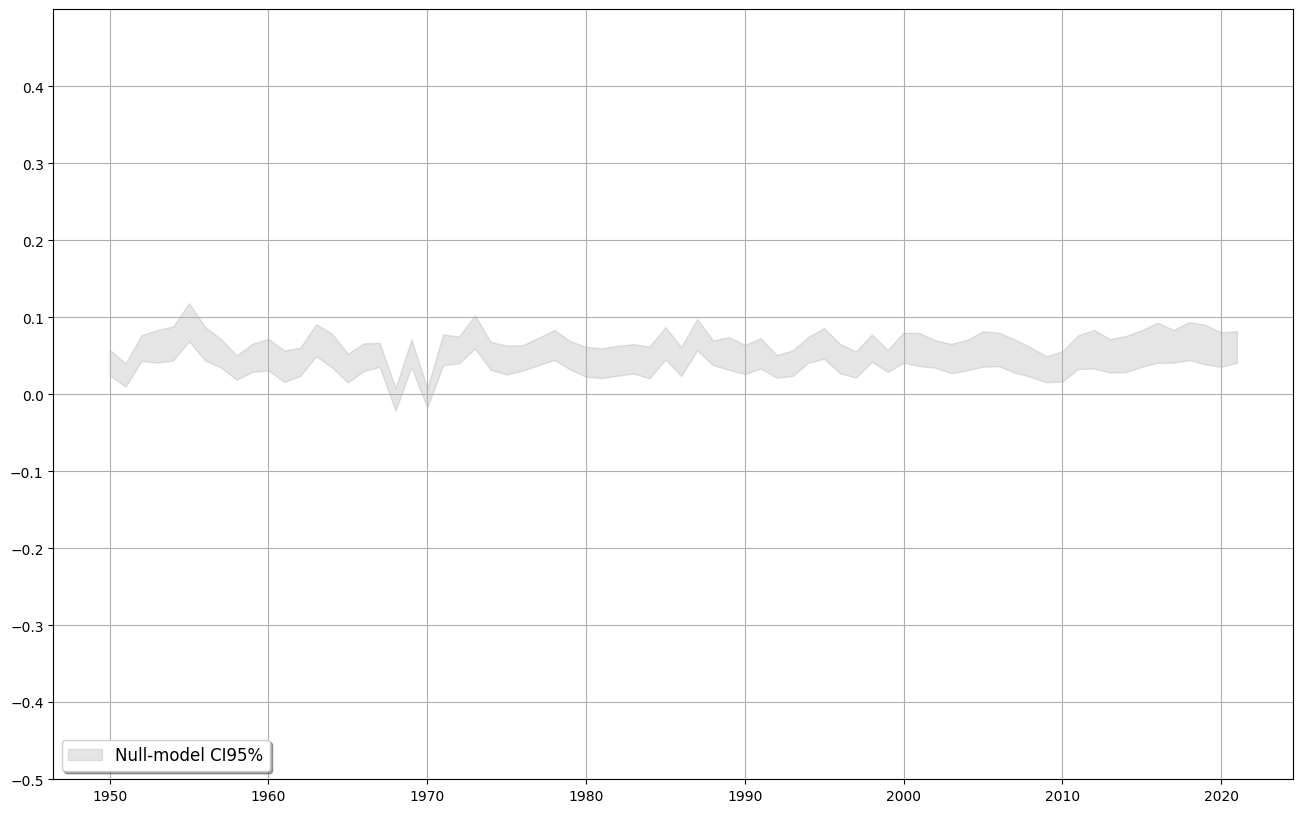

In [7]:
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# plot the 95% confidence interval as a grey band
ax.fill_between(random_vic['year'], random_vic['lower'], random_vic['upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

plt.show()

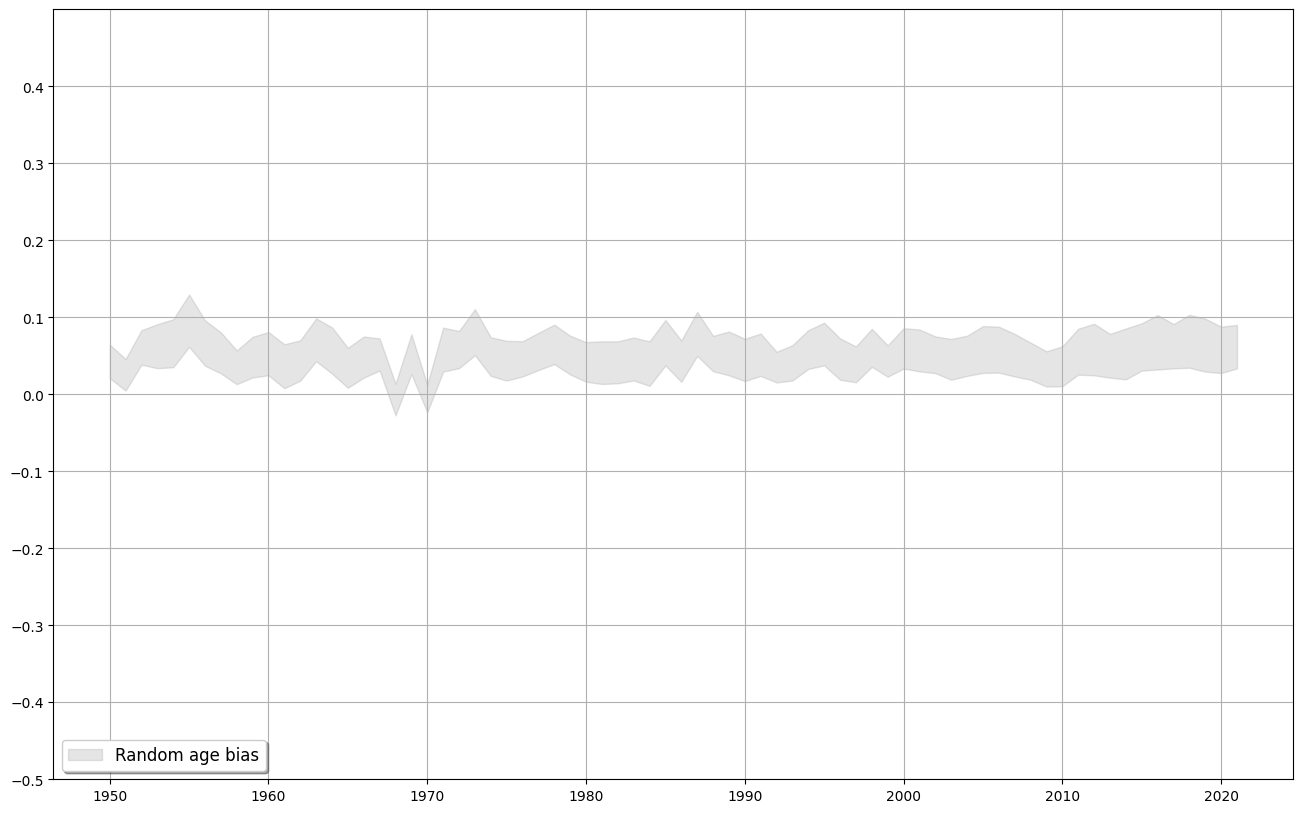

In [23]:
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# plot the 95% confidence interval as a grey band
ax.fill_between(random_pos['year'], random_pos['lower'], random_pos['upper'],
                 color='grey', alpha=0.2, label ='Random age bias')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

plt.show()

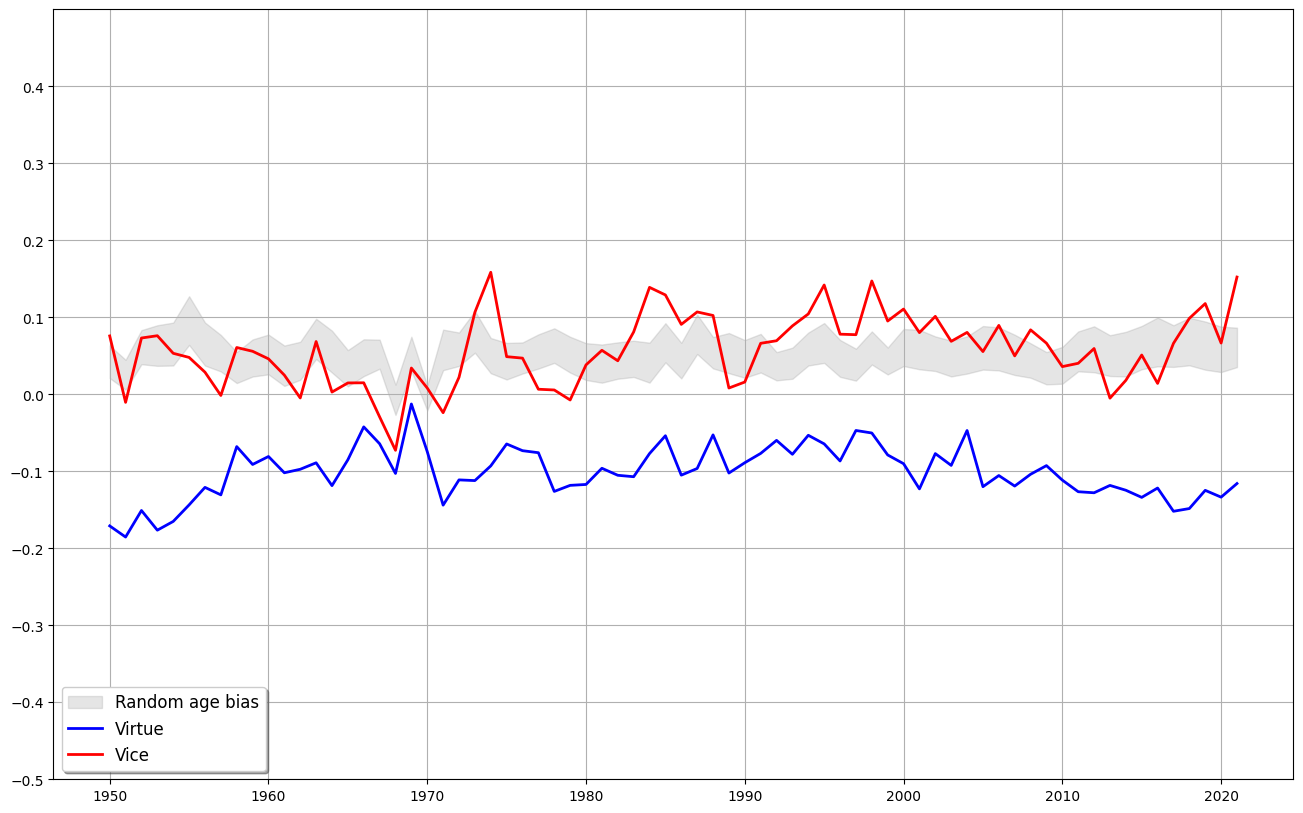

In [12]:
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# plot the 95% confidence interval as a grey band
ax.fill_between(random_neg['year'], random_neg['lower'], random_neg['upper'],
                 color='grey', alpha=0.2, label ='Random age bias')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])

ax.set_yticks(yticks)
ax.grid(True)
# Plot the lines from dfmft['virtue'] on the same plot
ax.plot(dfmft['year'], dfmft['virtue'], color='blue', label='Virtue', linewidth=2)
ax.plot(dfmft['year'], dfmft['vice'], color='red', label='Vice', linewidth=2)
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
plt.show()

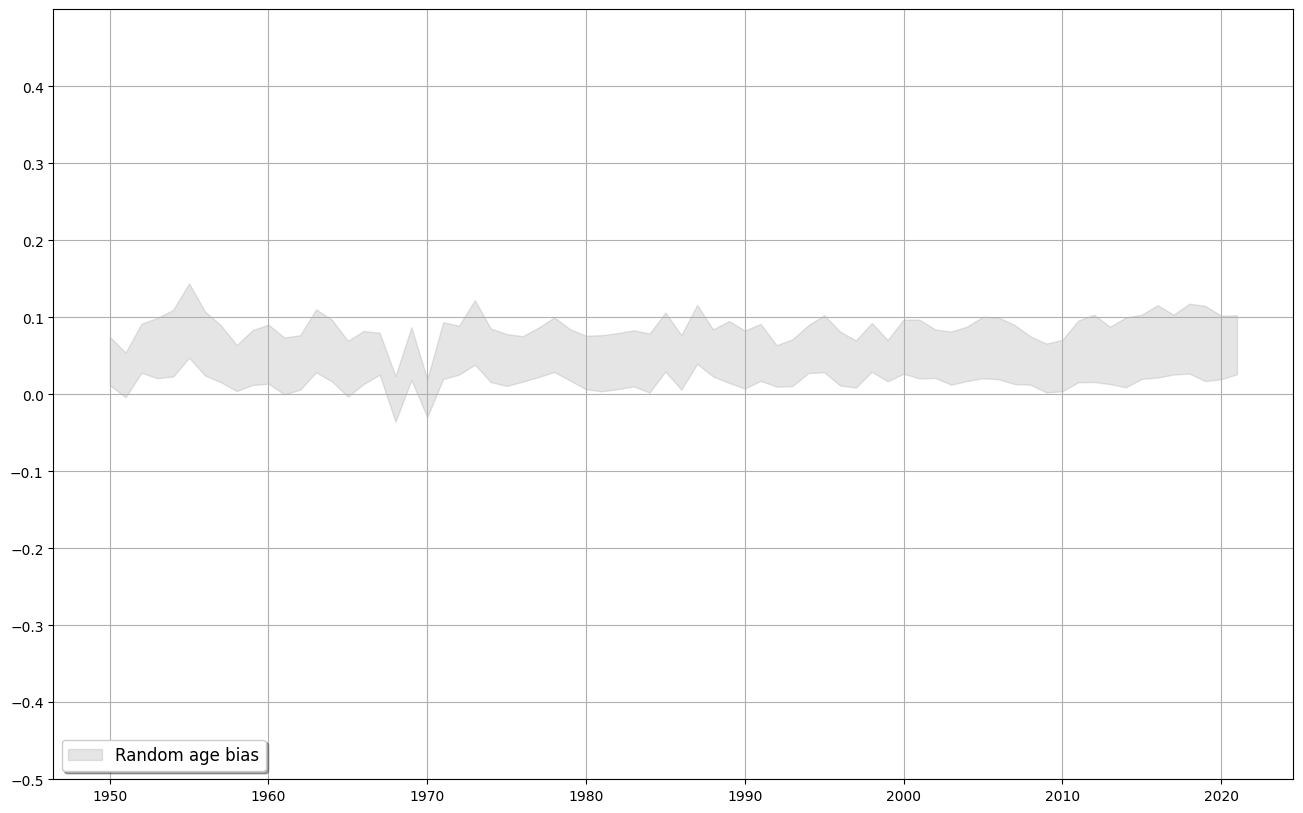

In [31]:
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# plot the 95% confidence interval as a grey band
ax.fill_between(random_comp['year'], random_comp['lower'], random_comp['upper'],
                 color='grey', alpha=0.2, label ='Random age bias')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

plt.show()

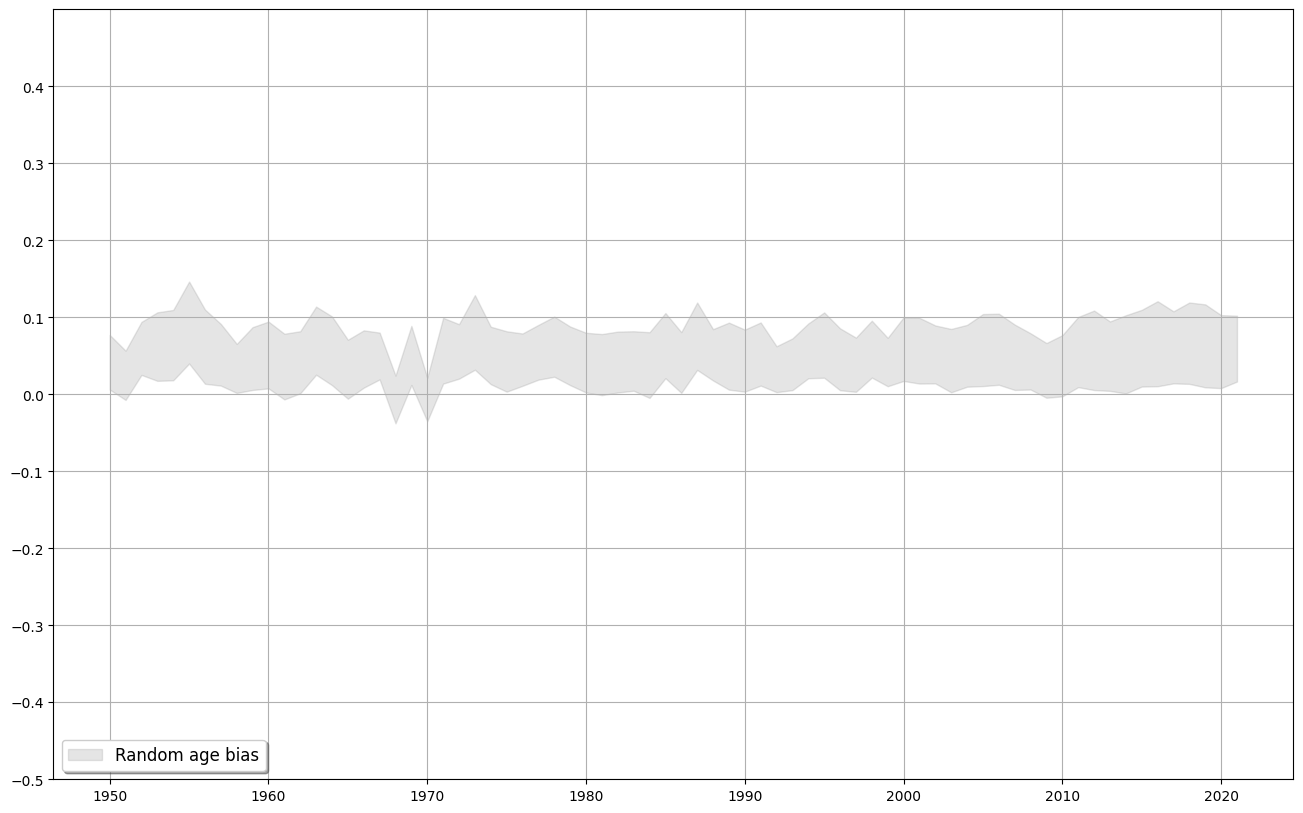

In [32]:
yticks=np.arange(-0.5,0.5,0.1)
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# plot the 95% confidence interval as a grey band
ax.fill_between(random_incomp['year'], random_incomp['lower'], random_incomp['upper'],
                 color='grey', alpha=0.2, label ='Random age bias')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

plt.show()

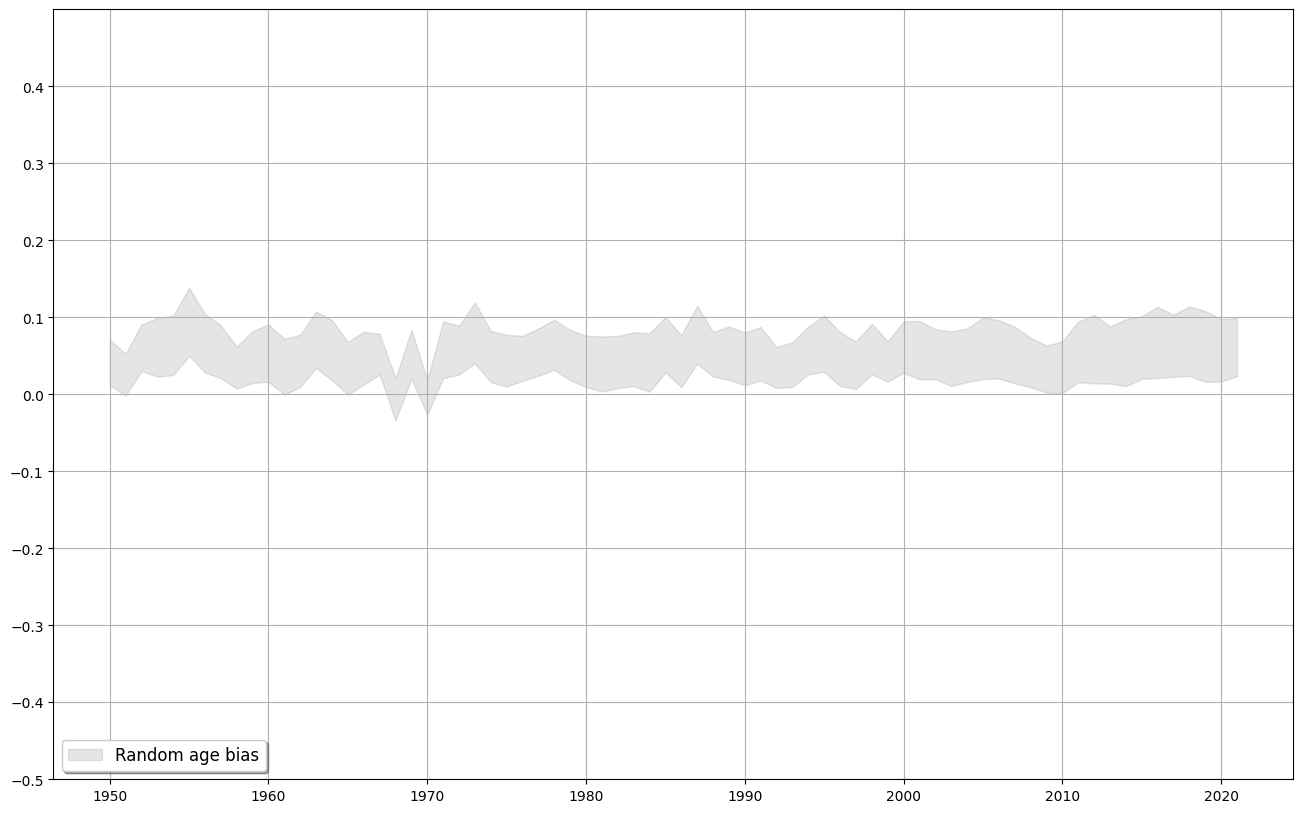

In [33]:
yticks=np.arange(-0.5,0.5,0.1)
fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# plot the 95% confidence interval as a grey band
ax.fill_between(random_warm['year'], random_warm['lower'], random_warm['upper'],
                 color='grey', alpha=0.2, label ='Random age bias')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

plt.show()

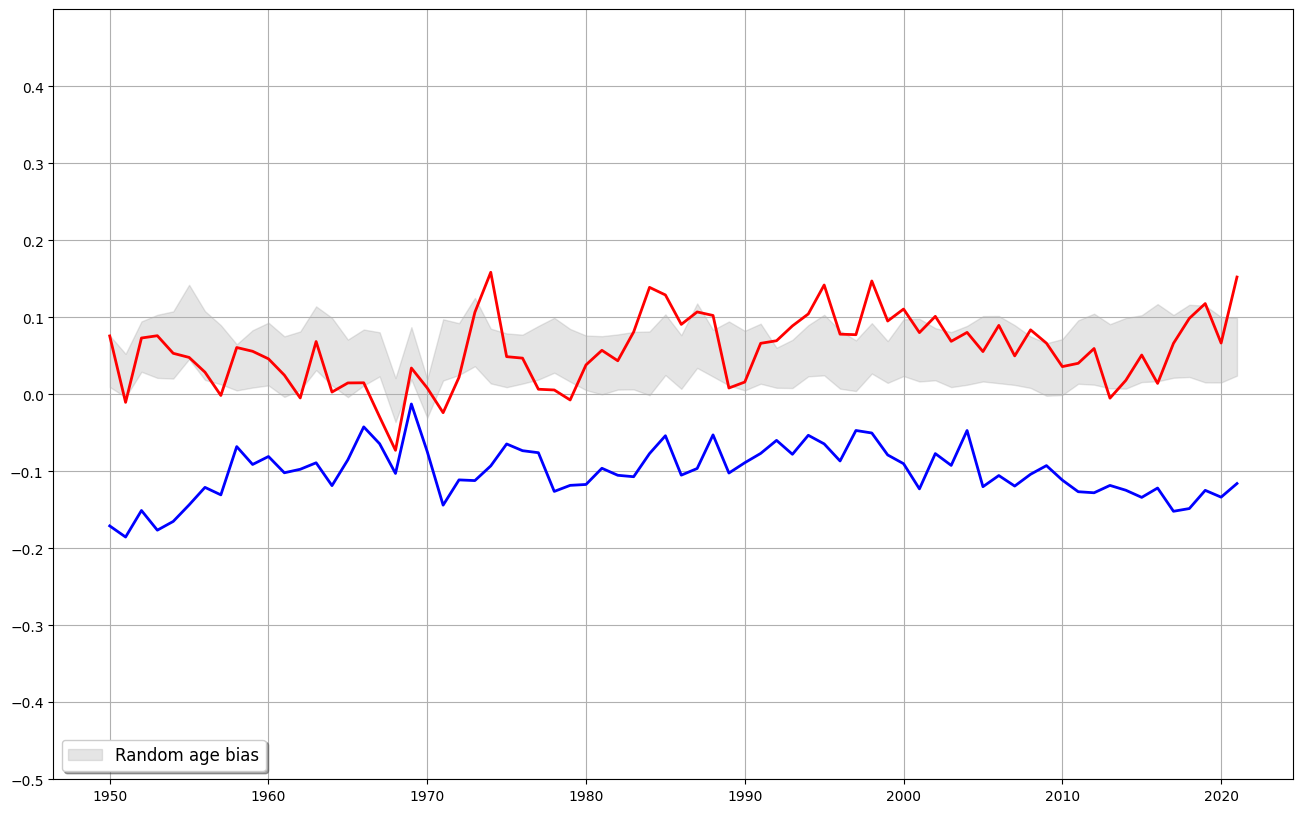

In [10]:
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
# plot the 95% confidence interval as a grey band
ax.fill_between(random_unwarm['year'], random_unwarm['lower'], random_unwarm['upper'],
                 color='grey', alpha=0.2, label ='Random age bias')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

plt.show()